In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Dataset 1
df1 = pd.read_csv('ev_charging.csv')
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [3]:
# Dataset 2
df2 = pd.read_csv('Electric_Vehicle_Data.csv')
df2.head()

,Unnamed: 0,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,NaN,Single,Graduate,5,1.193876e+06,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,NaN,Single,Graduate,4,1.844540e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,NaN,Single,Graduate,4,2.948150e+06,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2.832380e+06,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,NaN,Single,Graduate,4,2.638751e+06,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [4]:
df2.rename(columns={'No. of Family members': 'Family_Members'}, inplace=True)
df2.rename(columns={'Annual Income': 'Income'}, inplace=True)
df2.rename(columns={'Would you prefer replacing all your vehicles to Electronic vehicles?': 'Standard_To_EV'}, inplace=True)
df2.rename(columns={'If Yes/Maybe what type of  EV would you prefer?': 'Type'}, inplace=True)
df2.rename(columns={'Do you think Electronic Vehicles are economical?': 'Economical'}, inplace=True)
df2.rename(columns={'Which brand of vehicle do you currently own?': 'Current_Brand'}, inplace=True)
df2.rename(columns={'How much money could you spend on an Electronic vehicle?': 'Budget'}, inplace=True)
df2.rename(columns={'Preference for wheels in EV': 'Wheels'}, inplace=True)
df2.rename(columns={'Do you think Electronic vehicles will replace fuel cars in India?': 'Evolution_Of_EV'}, inplace=True)

In [5]:
df2.head()

,Unnamed: 0,Age,City,Profession,Marital Status,Education,Family_Members,Income,Standard_To_EV,Type,Economical,Current_Brand,Budget,Wheels,Evolution_Of_EV
0,0,30,Nabha,NaN,Single,Graduate,5,1.193876e+06,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,NaN,Single,Graduate,4,1.844540e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,NaN,Single,Graduate,4,2.948150e+06,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2.832380e+06,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,NaN,Single,Graduate,4,2.638751e+06,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [6]:
print('dimensions of df1: ', df1.shape)
print('dimensions of df2: ', df2.shape)

dimensions of df1:  (24, 6)
dimensions of df2:  (1000, 15)


## EDA of 1st dataset

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [8]:
df1.describe()

,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


In [9]:
print("Total number of 2 wheeler vehicles: ", df1['2W'].sum())
print("Total number of 3 wheeler vehicles: ", df1['3W'].sum())
print("Total number of 4 wheeler vehicles: ", df1['4W'].sum())

Total number of 2 wheeler vehicles:  202115
Total number of 3 wheeler vehicles:  92476
Total number of 4 wheeler vehicles:  8017


<Axes: xlabel='2W', ylabel='Region'>

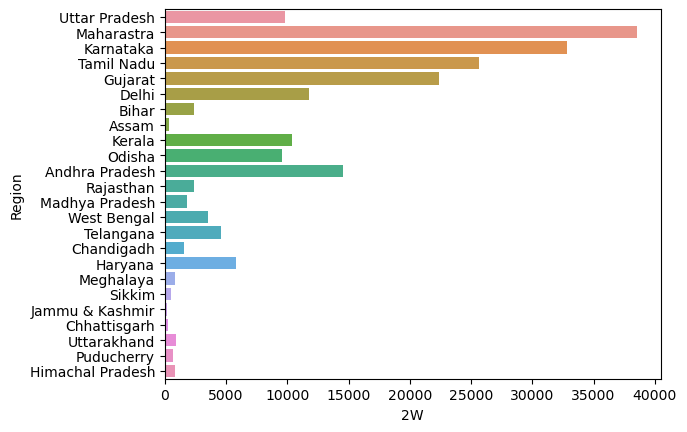

In [10]:
sns.barplot(x="2W", y="Region", data=df1)

<Axes: xlabel='3W', ylabel='Region'>

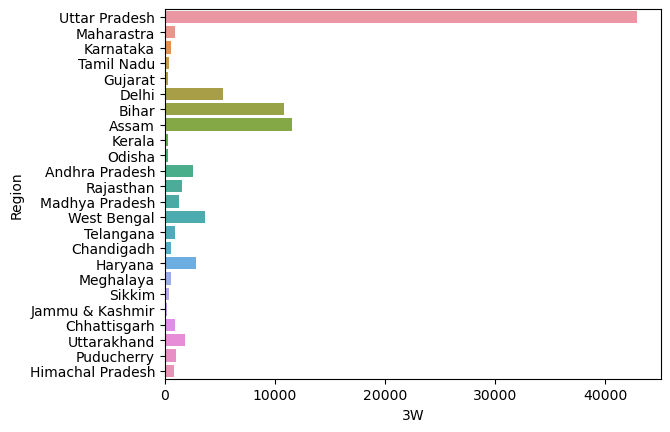

In [11]:
sns.barplot(x="3W", y="Region", data=df1)

<Axes: xlabel='4W', ylabel='Region'>

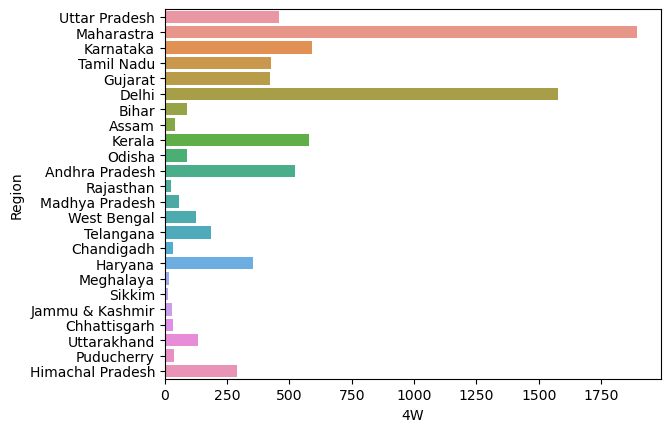

In [12]:
sns.barplot(x="4W", y="Region", data=df1)

<Axes: xlabel='Bus', ylabel='Region'>

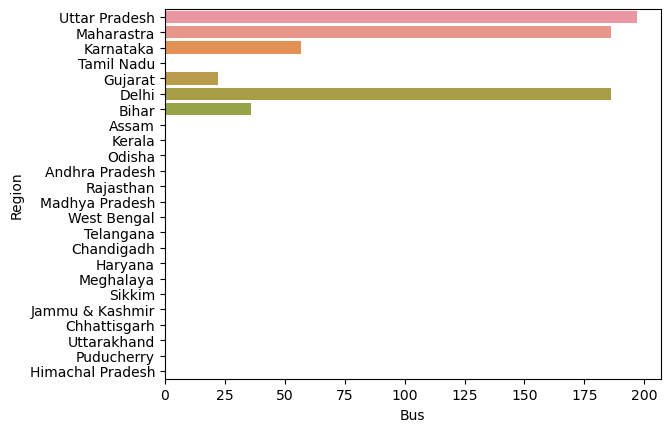

In [13]:
sns.barplot(x="Bus", y="Region", data=df1)

<Axes: xlabel='Chargers', ylabel='Region'>

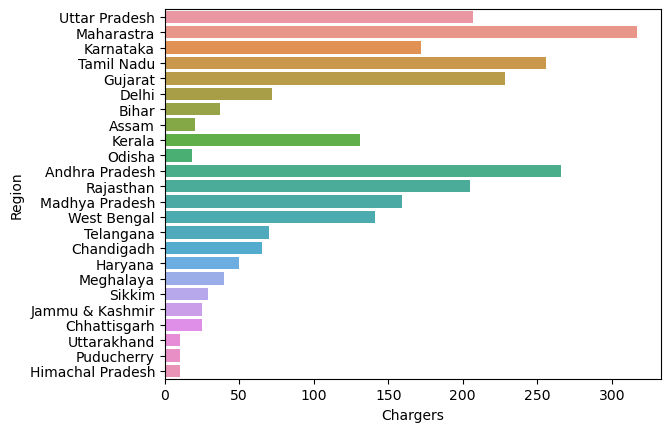

In [14]:
sns.barplot(x="Chargers", y="Region", data=df1)

* Maharashtra and Karnataka have the highest number of 2 wheeler EVs in India
* Uttar Pradesh has the highest number of 3 wheeler EVs in India
* Maharashtra and Delhi have the highest number of 4 wheeler EVs in India
* Only 6 states have electric buses throughout India
* Maharashtra, Andhra Pradesh and Tamil Nadu are leading producers of EV chargers

## EDA of 2nd dataset

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   City             1000 non-null   object 
 3   Profession       540 non-null    object 
 4   Marital Status   1000 non-null   object 
 5   Education        1000 non-null   object 
 6   Family_Members   1000 non-null   int64  
 7   Income           1000 non-null   float64
 8   Standard_To_EV   1000 non-null   object 
 9   Type             1000 non-null   object 
 10  Economical       1000 non-null   object 
 11  Current_Brand    1000 non-null   object 
 12  Budget           1000 non-null   object 
 13  Wheels           1000 non-null   int64  
 14  Evolution_Of_EV  1000 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 117.3+ KB


In [16]:
df2['Profession'].value_counts()

Profession
Working Professional    336
Business                167
Salaried                 37
Name: count, dtype: int64

In [17]:
df2['Profession'] = df2['Profession'].fillna('Self Employed')

In [18]:
df2.sample(20)

,Unnamed: 0,Age,City,Profession,Marital Status,Education,Family_Members,Income,Standard_To_EV,Type,Economical,Current_Brand,Budget,Wheels,Evolution_Of_EV
913,913,26,Pune,Working Professional,Single,Post Graduate,4,2.693948e+06,Maybe,SUV,No,Honda,<25 lakhs,3,"Yes, in <20years"
891,891,21,Pune,Self Employed,Single,Graduate,4,1.935638e+06,Maybe,SUV,Yes,Nissan,<5 lakhs,4,"Yes, possibly after 20 years"
469,469,31,New Delhi,Working Professional,Married,Graduate,5,4.839884e+05,Yes,Liftback,Yes,Maruti,<5 lakhs,4,I don't think so
838,838,28,Mumbai,Self Employed,Married,Graduate,4,2.651441e+06,Maybe,Sedan,Yes,Honda,<5 lakhs,2,"Yes, in <10 years"
476,476,27,Pune,Self Employed,Single,Graduate,5,2.873753e+06,Yes,Sedan,Yes,KIA,<15 lakhs,2,"Yes, in <10 years"
381,381,28,Pune,Self Employed,Single,Graduate,4,1.758735e+06,Yes,SUV,Yes,Hyundai,<15 lakhs,4,"Yes, in <10 years"
963,963,30,Chandrapur,Self Employed,Single,Graduate,4,1.009305e+06,Maybe,SUV,Yes,Hyundai,<15 lakhs,2,"Yes, possibly after 20 years"
788,788,57,Pune,Self Employed,Married,Graduate,4,2.059997e+06,Yes,Sedan,Yes,KIA,<15 lakhs,2,"Yes, in <10 years"
910,910,29,Pune,Working Professional,Married,Graduate,3,2.751919e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
610,610,29,Pune,Business,Single,Post Graduate,8,2.688821e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, possibly after 20 years"


<Axes: xlabel='count', ylabel='Profession'>

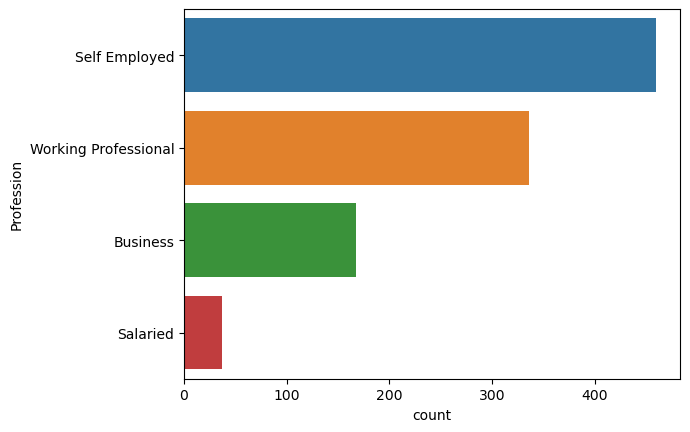

In [19]:
sns.countplot(y=df2['Profession'], order=df2['Profession'].value_counts().index)

<Axes: xlabel='count', ylabel='City'>

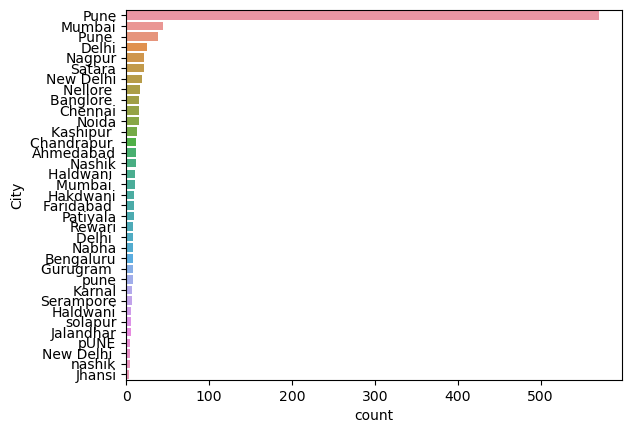

In [20]:
sns.countplot(y=df2['City'], order=df2['City'].value_counts().index)

<Axes: xlabel='count', ylabel='Type'>

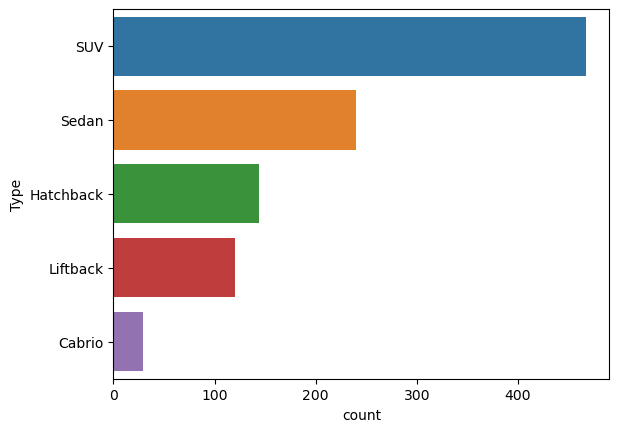

In [21]:
sns.countplot(y=df2['Type'], order=df2['Type'].value_counts().index)

<Axes: xlabel='Income', ylabel='Profession'>

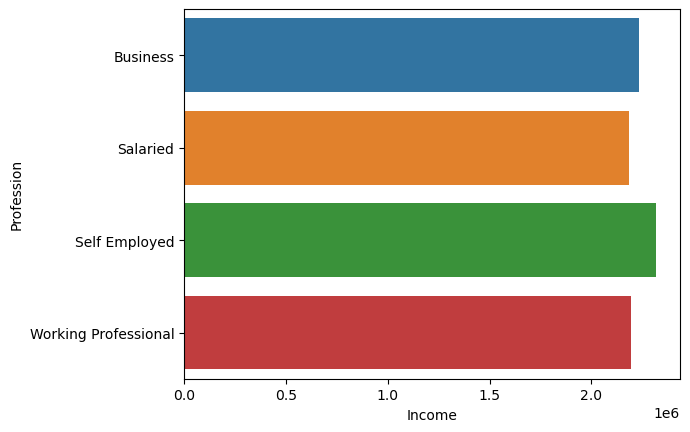

In [22]:
average_prices = df2.groupby('Profession')['Income'].mean().reset_index()
sns.barplot(x='Income', y='Profession', data=average_prices, orient='h')

<Axes: xlabel='count', ylabel='Budget'>

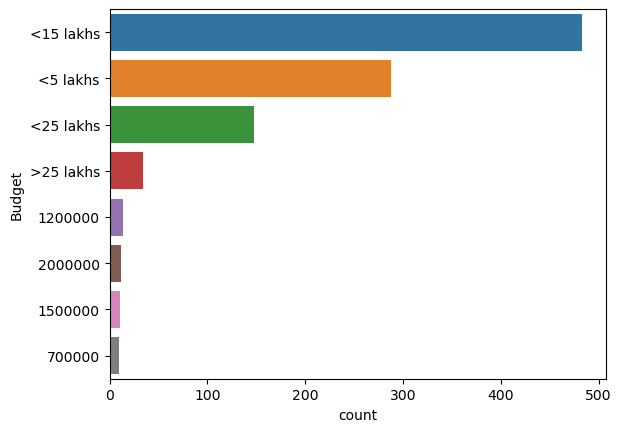

In [23]:
sns.countplot(y=df2['Budget'], order=df2['Budget'].value_counts().index)

<Axes: xlabel='Wheels', ylabel='count'>

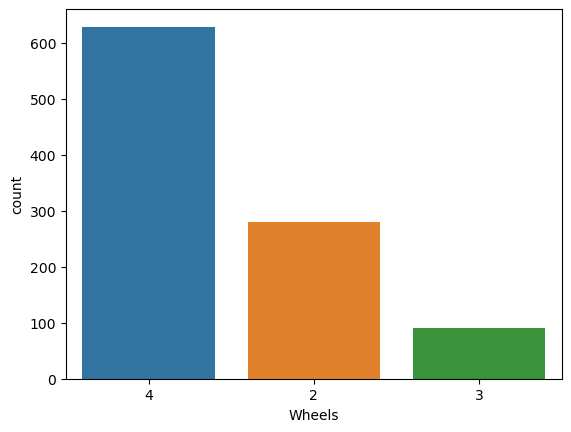

In [24]:
sns.countplot(x=df2['Wheels'], order=df2['Wheels'].value_counts().index)

<Axes: xlabel='count', ylabel='Evolution_Of_EV'>

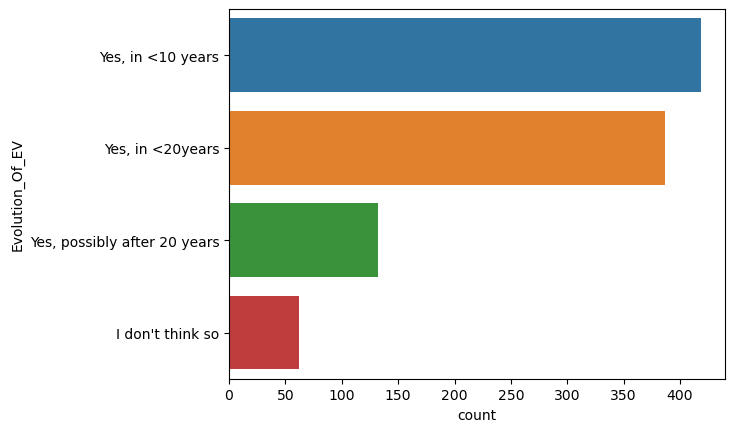

In [25]:
sns.countplot(y=df2['Evolution_Of_EV'], order=df2['Evolution_Of_EV'].value_counts().index)

<Axes: xlabel='Economical', ylabel='count'>

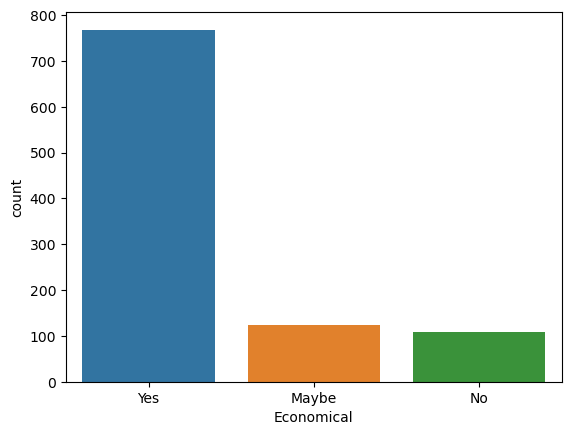

In [26]:
sns.countplot(x=df2['Economical'], order=df2['Economical'].value_counts().index)

<Axes: xlabel='count', ylabel='Current_Brand'>

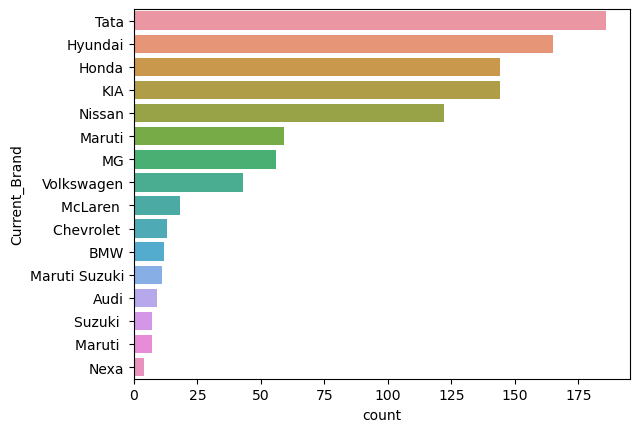

In [27]:
sns.countplot(y=df2['Current_Brand'], order=df2['Current_Brand'].value_counts().index)

In [28]:
df2.head()

,Unnamed: 0,Age,City,Profession,Marital Status,Education,Family_Members,Income,Standard_To_EV,Type,Economical,Current_Brand,Budget,Wheels,Evolution_Of_EV
0,0,30,Nabha,Self Employed,Single,Graduate,5,1.193876e+06,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,Self Employed,Single,Graduate,4,1.844540e+06,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,Self Employed,Single,Graduate,4,2.948150e+06,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2.832380e+06,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,Self Employed,Single,Graduate,4,2.638751e+06,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [29]:
df2['Marital Status'].unique()

array(['Single', 'Married'], dtype=object)

In [30]:
df2['Education'].unique()

array(['Graduate', 'Post Graduate'], dtype=object)

## Transformation of variables

In [31]:
df2['Marital Status'].replace(to_replace=['Single','Married'],value=[0, 1],inplace=True)
df2['Economical'].replace(to_replace=['No', 'Maybe', 'Yes'],value=[0, 0, 1],inplace=True)
df2['Post_Graduate'] = df2['Education'].apply(lambda x:1 if 'Post Graduate' in x else 0)
df2['Standard_to_EV'] = df2['Standard_To_EV'].apply(lambda x:1 if 'Yes' in x else 0)
df2['Standard_to_EV'] = df2['Standard_To_EV'].apply(lambda x:1 if 'Yes' in x else 0)
df2['Budget'].replace(to_replace=['<5 lakhs','<15 lakhs', '<25 lakhs', '>25 lakhs'],value=[5, 15, 25, 30],inplace=True)
df2['Evolution_Of_EV'].replace(to_replace=['I don\'t think so','Yes, in <10 years', 'Yes, in <20years', 'Yes, possibly after 20 years'],value=[0, 10, 20, 30],inplace=True)

In [32]:
labelEncoding = LabelEncoder()
df2['City'] = labelEncoding.fit_transform(df2['City'])
df2['Type'] = labelEncoding.fit_transform(df2['Type'])
df2['Current_Brand'] = labelEncoding.fit_transform(df2['Current_Brand'])

In [33]:
df2 = pd.get_dummies(df2, columns = ['Profession'], drop_first=True)

In [34]:
df2['Profession_Salaried'] = df2['Profession_Salaried'].astype('int')
df2['Profession_Self Employed'] = df2['Profession_Self Employed'].astype('int')
df2['Profession_Working Professional'] = df2['Profession_Working Professional'].astype('int')

In [35]:
del df2['Unnamed: 0']
del df2['Education']
del df2['Standard_To_EV']

df2['Age'].value_counts()

In [36]:
df2 = df2[df2['Age'] != 118]

In [37]:
df2.head()

,Age,City,Marital Status,Family_Members,Income,Type,Economical,Current_Brand,Budget,Wheels,Evolution_Of_EV,Post_Graduate,Standard_to_EV,Profession_Salaried,Profession_Self Employed,Profession_Working Professional
0,30,18,0,5,1.193876e+06,3,1,4,5,2,0,0,0,0,1,0
1,27,26,0,4,1.844540e+06,3,1,3,15,4,20,0,1,0,1,0
2,32,15,0,4,2.948150e+06,1,1,5,15,4,20,0,1,0,1,0
3,55,26,0,3,2.832380e+06,1,0,4,5,4,10,0,0,0,0,0
4,26,29,0,4,2.638751e+06,4,1,10,15,4,20,0,1,0,1,0


In [38]:
df2['Economical'].value_counts()

Economical
1    767
0    232
Name: count, dtype: int64

In [39]:
df2['Budget'] = df2['Budget'].astype('int')
df2['Income'] = df2['Income'].round(decimals=2)

In [40]:
df2['Budget'].unique()

array([      5,      15,      25,  700000,      30, 2000000, 1200000,
       1500000])

In [41]:
df2['Budget'].replace(to_replace=[700000, 1200000, 1500000, 2000000],value=[7, 12, 15, 20],inplace=True)

In [42]:
df2.shape

(999, 16)

## Unsupervised learning on 1st dataset

### K-Means

In [43]:
X = df1[['4W', 'Chargers']].values

D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo

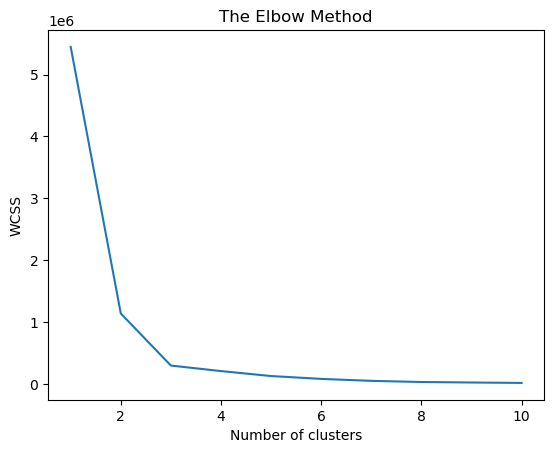

In [44]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [45]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
y_kmeans = kmeans.labels_
y_kmeans

array([0, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1])

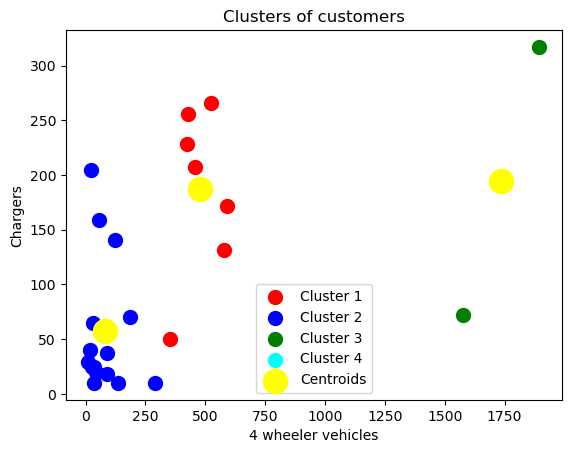

In [47]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('4 wheeler vehicles')
plt.ylabel('Chargers')
plt.legend()
plt.show()

In [48]:
df1['ClusterLabel'] = y_kmeans+1

In [49]:
df1.head()

,Region,2W,3W,4W,Bus,Chargers,ClusterLabel
0,Uttar Pradesh,9852,42881,458,197,207,1
1,Maharastra,38558,893,1895,186,317,3
2,Karnataka,32844,568,589,57,172,1
3,Tamil Nadu,25642,396,426,0,256,1
4,Gujarat,22359,254,423,22,228,1


In [50]:
labelEncoding = LabelEncoder()
df1['Region'] = labelEncoding.fit_transform(df1['Region'])

In [51]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
df1.head(10)

,Region,2W,3W,4W,Bus,Chargers,ClusterLabel
0,21,9852,42881,458,197,207,1
1,13,38558,893,1895,186,317,3
2,10,32844,568,589,57,172,1
3,19,25642,396,426,0,256,1
4,6,22359,254,423,22,228,1
5,5,11756,5287,1578,186,72,3
6,2,2388,10783,89,36,37,2
7,1,357,11547,42,0,20,2
8,11,10345,308,578,0,131,1
9,15,9540,253,89,0,18,2


In [54]:
df2.to_csv('ajsas.csv')

In [55]:
df1['Region'].unique()

array([21, 13, 10, 19,  6,  5,  2,  1, 11, 15,  0, 17, 12, 23, 20,  3,  7,
       14, 18,  9,  4, 22, 16,  8])

In [56]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
accuracy_score(y_test, y_pred)

[[1 0]
 [0 4]]


1.0

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_train)
print(confusion_matrix(y_train, y_pred))
accuracy_score(y_train, y_pred)

[[ 5  1  0]
 [ 0 11  0]
 [ 1  0  1]]


0.8947368421052632

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_1332\3318974776.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


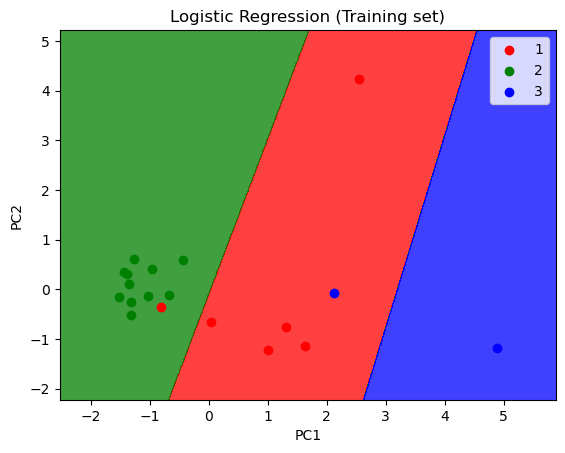

In [61]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_1332\3946207957.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


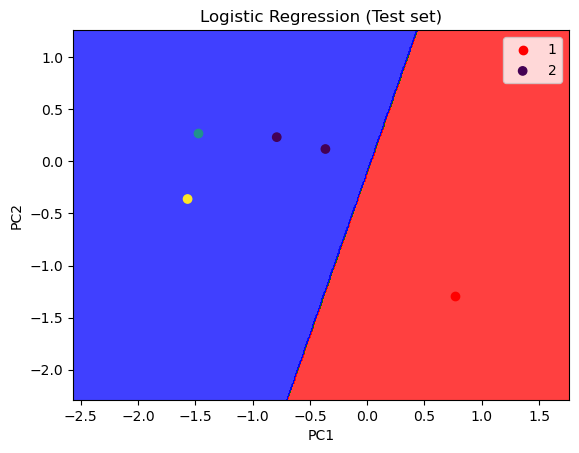

In [62]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Unsupervised on 2nd dataset

In [63]:
X = df2[['Income', 'City']].values

D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

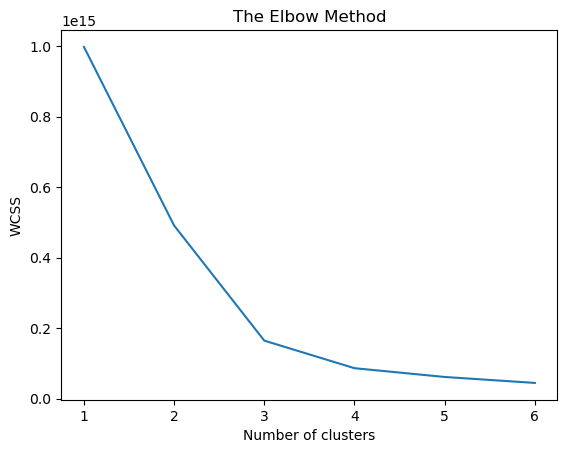

In [64]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 7), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [65]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [66]:
y_kmeans = kmeans.labels_
y_kmeans

array([2, 3, 0, 0, 0, 0, 0, 3, 3, 2, 0, 3, 2, 3, 3, 0, 3, 3, 0, 2, 0, 0,
       0, 3, 2, 3, 3, 3, 3, 3, 2, 0, 3, 0, 3, 3, 0, 3, 0, 2, 3, 2, 3, 3,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 3, 2, 2, 0, 3, 0, 3, 0, 2, 2, 0, 2,
       0, 3, 0, 0, 0, 0, 0, 2, 0, 3, 0, 3, 0, 0, 0, 0, 3, 2, 2, 3, 0, 3,
       2, 3, 3, 0, 3, 0, 0, 3, 2, 3, 3, 0, 0, 3, 2, 2, 0, 0, 3, 3, 3, 2,
       0, 3, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 3, 2, 0, 3, 3, 0, 3, 3, 0, 2,
       2, 2, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0,
       2, 0, 0, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 3, 0, 3, 3, 0, 2, 0, 3, 3,
       0, 2, 3, 0, 0, 3, 3, 3, 0, 2, 0, 3, 3, 0, 2, 0, 0, 0, 3, 2, 3, 3,
       0, 3, 2, 0, 3, 0, 0, 3, 3, 0, 3, 2, 3, 0, 0, 2, 0, 0, 3, 0, 0, 0,
       2, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 2, 2, 2, 0, 0, 0, 3, 3, 3,
       0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0, 2, 0, 3, 0, 0, 3, 0, 3,
       0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 2, 2, 2, 0,
       0, 3, 3, 2, 3, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0,

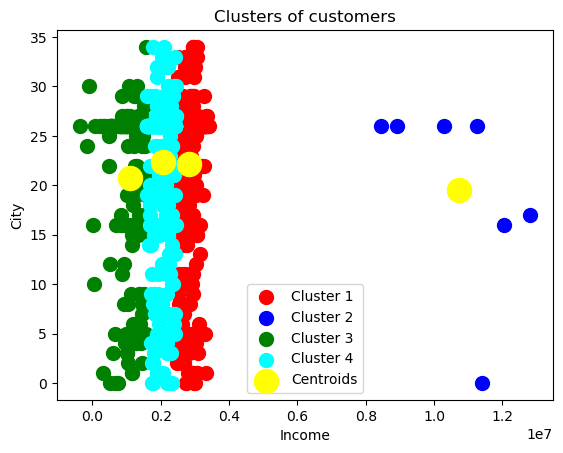

In [67]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Income')
plt.ylabel('City')
plt.legend()
plt.show()

In [68]:
df2['ClusterLabel'] = y_kmeans+1

### PCA

In [69]:
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [71]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [73]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[59  0  0 22]
 [ 2  0  0  0]
 [30  0  0 18]
 [51  0  0 18]]


0.385

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_train)
print(confusion_matrix(y_train, y_pred))
accuracy_score(y_train, y_pred)

[[257   0   0  92]
 [  4   0   0   1]
 [ 96   0   0  51]
 [194   0   0 104]]


0.4518147684605757

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_1332\3318974776.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


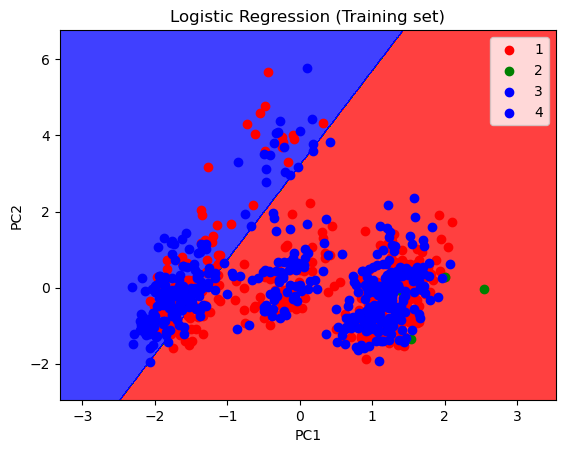

In [76]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_1332\3946207957.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


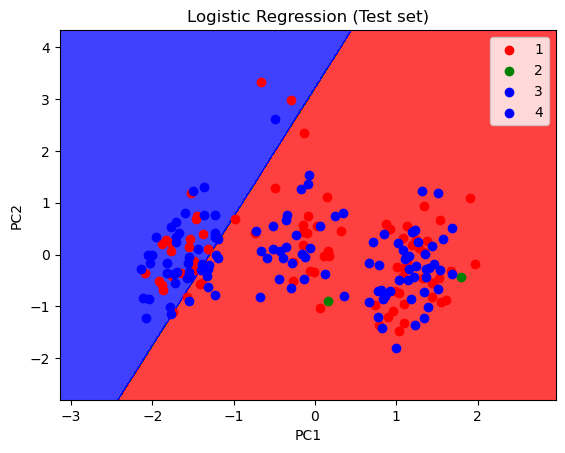

In [77]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()